# Introduction
In this project we are going to use the Titanic dataset to predict the survival or a passenger on the ship. The dataset is obtained form Kaggle. 


# Data Description
There are 10 variables in the dataset:
- survival: Survival
- pclass: Ticket class
- sex: Sex
- Age: Age in years
- sibsp: # of sibblings/spouses abroad the Titanic
- parch: # of parents/children abroad the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation


We are going to do some basic data analysis followed byt feature engineering and for the prediction part we will use models. 

# Analysis of Data

# Importing necessary libraries

In [67]:
# First we need to import libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Data

In [68]:
# Reading the train and test .csv file into a pandas dataframe
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [69]:
# Printng first five rows fron train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring the Data

In [70]:
# Lets look at columns of the data
cols_names = train.columns
cols_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In this step we will explore the data, first by checking if there exists any missing data.

In [71]:
# Checking for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

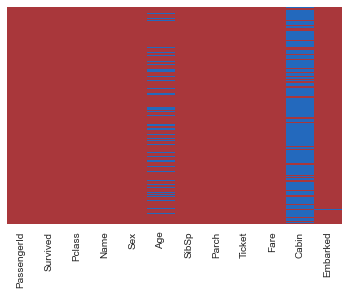

In [72]:
# Checking for missing data with heat map
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='vlag_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

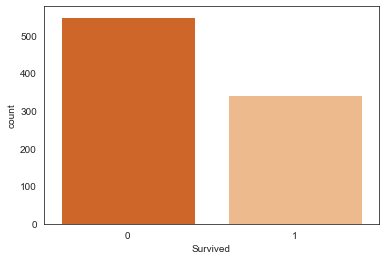

In [73]:
# 
sns.set_style('white')
sns.countplot(x='Survived', data =train, palette='Oranges_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

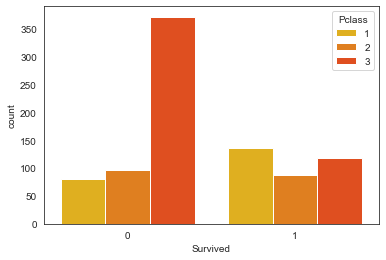

In [74]:
sns.set_style('white')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='autumn_r')

/Users/masoomajafari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

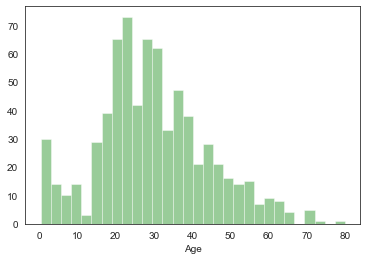

In [75]:
sns.distplot(train['Age'].dropna(),kde=False,color='green',bins=30)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
# Dividing the data into categorical and numerical
df_numerical = train[['Age','SibSp','Parch','Fare']]
df_categorical = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

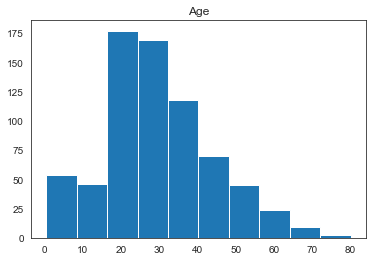

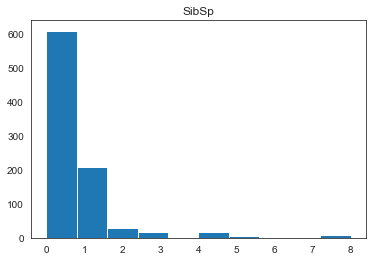

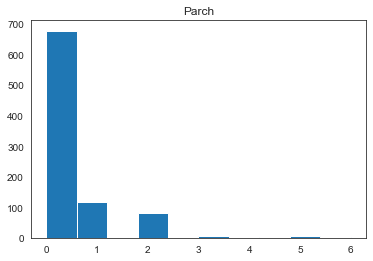

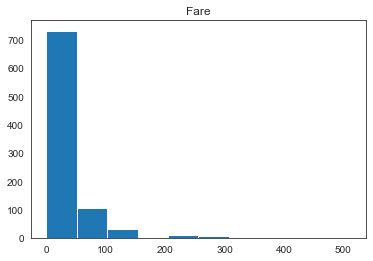

In [79]:
# Plotting the numerical data
for i in df_numerical.columns:
    plt.hist(df_numerical[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

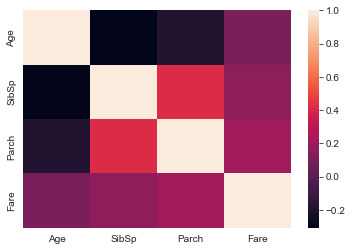

In [80]:
# Correlation between the numerical data, using heatmap
sns.heatmap(df_numerical.corr())

In [81]:
# Compare survival rates across the numeric variables
pd.pivot_table(train, index='Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [82]:
# Compare categorical variables with dependent variable (People Survived)
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering

In [83]:
# Splitting into individual cabins 
df_categorical.Cabin
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [84]:
# Survival rate vs multiple cabins
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [85]:
# Handling missing values
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [86]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

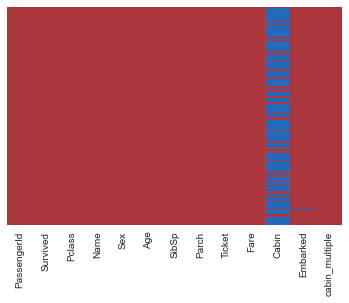

In [87]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='vlag_r')

In [88]:
# Drop the Cabin column and the row in Embarked that is NaN
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [89]:
# Converting Categorical Features
# Convert categorical variables into dummy variables for Machine Learning algorithm

# Train data
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [90]:
# Test data
test_sex = pd.get_dummies(test['Sex'],drop_first=True)
test_embark = pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test = pd.concat([test,test_sex,test_embark],axis=1)

In [91]:
#fill null value of fare column with 0
test.Fare.fillna(0 ,inplace = True)

# Model Deployment

In [97]:
# import the important libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [98]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived','PassengerId'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [99]:
print (X_train.shape, X_test.shape, 
       y_train.shape, y_test.shape)

(623, 9) (268, 9) (623,) (268,)


In [102]:
# Logistic regression pipeline with the StandardScaler as a pre-processing step
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('logistic', LogisticRegression())])

In [103]:
# Fit and score
fit = pipe.fit(X_train, y_train)
fit.score(X_test, y_test)

0.7761194029850746

In [104]:
# Score with cross-validation
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(pipe,
                             X_test,
                             y_test,
                             cv=5,
                             scoring='accuracy')

cv_results.mean()

0.7647099930118799

In [106]:
# Coefficient performance
list(zip(train.columns, fit.named_steps['logistic'].coef_[0]))

[('PassengerId', -0.8004748732564555),
 ('Survived', -0.5118358316300106),
 ('Pclass', -0.3269696736647423),
 ('Age', -0.09350903921334451),
 ('SibSp', 0.11852597502267427),
 ('Parch', 0.20020210607354103),
 ('Fare', -1.2928447031628594),
 ('cabin_multiple', -0.0323675908464517),
 ('male', -0.19878031601639587)]

In [108]:
# Predicting
predictions = logmodel.predict(X_test)

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

